data already exists. Skipping extraction.
data already exists. Skipping extraction.
Loading dataset from subfolders...
Loading class: non_weed (index: 0)
Loading class: weed (index: 1)
Found 2 classes: ['non_weed', 'weed']
Total images: 9152
Class 'non_weed': 829 images
Class 'weed': 8323 images
Training set: 7321 images
Testing set: 1831 images


C:\Users\Seenaiah\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Seenaiah\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 92s 378ms/step - accuracy: 0.8907 - loss: 0.3289 - val_accuracy: 0.9148 - val_loss: 0.2612
Epoch 2/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 84s 364ms/step - accuracy: 0.9250 - loss: 0.2100 - val_accuracy: 0.9268 - val_loss: 0.1963
Epoch 3/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 84s 364ms/step - accuracy: 0.9321 - loss: 0.2017 - val_accuracy: 0.9356 - val_loss: 0.1797
Epoch 4/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 82s 358ms/step - accuracy: 0.9310 - loss: 0.1862 - val_accuracy: 0.9356 - val_loss: 0.1816
Epoch 5/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 81s 354ms/step - accuracy: 0.9419 - loss: 0.1656 - val_accuracy: 0.9388 - val_loss: 0.1622
Epoch 6/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 82s 357ms/step - accuracy: 0.9329 - loss: 0.1878 - val_accuracy: 0.9339 - val_loss: 0.1805
Epoch 7/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 81s 354ms/step - accuracy: 0.9400 - loss: 0.1760 - val_accuracy: 0.9356 - val_loss: 0.1679
Epoch 8/10
229/229 ━━━━━━━━━━━━━━━━━━━━ 83s 361ms/step - accuracy: 0.9483 - loss: 0

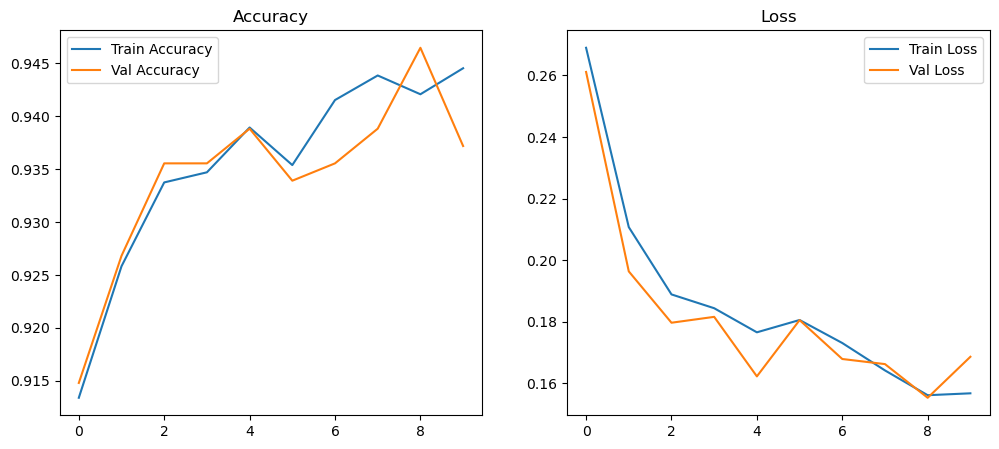

Model and class indices saved successfully

Test prediction functionality with a few test images:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
Image 0: True class: weed, Predicted: weed with 100.00% confidence
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Image 1: True class: weed, Predicted: weed with 100.00% confidence
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Image 2: True class: weed, Predicted: weed with 99.86% confidence
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Image 3: True class: weed, Predicted: weed with 81.02% confidence
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
Image 4: True class: weed, Predicted: weed with 79.11% confidence


In [3]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile

# Define dataset paths
weed_zip = "augmented_data.zip"
non_weed_zip = "archive.zip"
data_path = "data"  # Main data directory

# Function to extract zip files
def extract_zip(zip_path, extract_to):
    if not os.path.exists(extract_to):  # Only extract if folder doesn't exist
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_to)
        print(f"Extracted {zip_path} to {extract_to}")
    else:
        print(f"{extract_to} already exists. Skipping extraction.")

# Create data directory if it doesn't exist
os.makedirs(data_path, exist_ok=True)

# Extract datasets
extract_zip(weed_zip, data_path)
extract_zip(non_weed_zip, data_path)

# Function to load images and their labels from subfolders
def load_dataset(base_path):
    images = []
    labels = []
    class_names = []
    class_indices = {}
    
    # Find all subdirectories (classes)
    subdirs = [d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d))]
    
    for idx, subdir in enumerate(subdirs):
        class_path = os.path.join(base_path, subdir)
        class_names.append(subdir)
        class_indices[subdir] = idx
        print(f"Loading class: {subdir} (index: {idx})")
        
        # Find all image files in this class
        valid_extensions = {".jpg", ".jpeg", ".png"}
        image_files = glob.glob(os.path.join(class_path, "**", "*.*"), recursive=True)
        image_files = [f for f in image_files if os.path.splitext(f)[1].lower() in valid_extensions]
        
        for img_path in image_files:
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (128, 128))  # Resize for consistency
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
                images.append(img)
                labels.append(idx)
    
    return np.array(images), np.array(labels), class_names, class_indices

# Load images and labels
print("Loading dataset from subfolders...")
images, labels, class_names, class_indices = load_dataset(data_path)

print(f"Found {len(class_names)} classes: {class_names}")
print(f"Total images: {len(images)}")

if len(images) == 0:
    print("Error: No images found. Check dataset paths and formats.")
else:
    # Display class distribution
    unique_labels, counts = np.unique(labels, return_counts=True)
    for i, label in enumerate(unique_labels):
        print(f"Class '{class_names[label]}': {counts[i]} images")
    
    # Normalize images
    images = images / 255.0
    
    # Convert labels to categorical
    num_classes = len(class_names)
    labels_categorical = to_categorical(labels, num_classes=num_classes)
    
    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(
        images, labels_categorical, test_size=0.2, random_state=42, stratify=labels
    )
    
    print(f"Training set: {len(X_train)} images")
    print(f"Testing set: {len(X_test)} images")
    
    # Data augmentation
    datagen = ImageDataGenerator(
        rotation_range=30,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        zoom_range=0.1
    )
    
    # Define CNN model
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
        MaxPooling2D(2,2),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')  # Output layer with num_classes neurons
    ])
    
    # Compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Train model
    history = model.fit(
        datagen.flow(X_train, y_train, batch_size=32),
        validation_data=(X_test, y_test),
        epochs=10,
        verbose=1
    )
    
    # Evaluate model
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print(f"Test Accuracy: {test_acc * 100:.2f}%")
    
    # Plot training history
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.legend()
    plt.title("Accuracy")
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.legend()
    plt.title("Loss")
    
    plt.show()
    
    # Save the model
    model.save("weed_classifier_multi_class.h5")
    
    # Save class names for future inference
    import json
    with open("class_indices.json", "w") as f:
        json.dump(class_indices, f)
    
    print("Model and class indices saved successfully")
    
    # Function to make predictions on new images
    def predict_image(image_path, model, class_names):
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (128, 128))
        img = img / 255.0
        img = np.expand_dims(img, axis=0)
        
        prediction = model.predict(img)
        predicted_class = np.argmax(prediction, axis=1)[0]
        confidence = np.max(prediction) * 100
        
        return class_names[predicted_class], confidence
    
    print("\nTest prediction functionality with a few test images:")
    for i in range(min(5, len(X_test))):
        test_img = X_test[i]
        true_label = np.argmax(y_test[i])
        
        # Save temp image for prediction
        temp_path = "image(1).jpg"
        cv2.imwrite(temp_path, cv2.cvtColor(np.uint8(test_img*255), cv2.COLOR_RGB2BGR))
        
        predicted_class, confidence = predict_image(temp_path, model, class_names)
        print(f"Image {i}: True class: {class_names[true_label]}, Predicted: {predicted_class} with {confidence:.2f}% confidence")
        
        os.remove(temp_path)  # Remove temp file